In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df = pd.read_csv("/Users/ruojiakuang/Downloads/cannabis_full.csv")
df.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part One: Binary Classification

In [33]:
sativa_indica_data = df[df['Type'].isin(['sativa', 'indica'])]

X = sativa_indica_data.drop(['Type'], axis=1)
X = X.select_dtypes(include='number')
y = sativa_indica_data['Type'].astype('category')

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

In [19]:
# Q1: LDA
lda_model = LinearDiscriminantAnalysis()
lda_cv_f1 = cross_val_score(lda_model, X_imputed, y, cv=5, scoring='f1_macro').mean()
print("LDA Cross-Validated F1-score:", lda_cv_f1)

lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
print("LDA Confusion Matrix:")
print(lda_confusion_matrix)

LDA Cross-Validated F1-score: 0.8286966304002183
LDA Confusion Matrix:
[[130  13]
 [ 15  70]]


In [21]:
# Q2: QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_cv_f1 = cross_val_score(qda_model, X_imputed, y, cv=5, scoring='f1_macro').mean()
print("QDA Cross-Validated F1-score:", qda_cv_f1)

qda_model.fit(X_train, y_train)
qda_predictions = qda_model.predict(X_test)
qda_confusion_matrix = confusion_matrix(y_test, qda_predictions)
print("QDA Confusion Matrix:")
print(qda_confusion_matrix)

QDA Cross-Validated F1-score: 0.370634340431048
QDA Confusion Matrix:
[[ 21 122]
 [  3  82]]


/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables a

In [24]:
# Q3: SVC
svc_model = SVC(kernel='poly')
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
svc_grid = GridSearchCV(svc_model, param_grid, cv=5, scoring='f1_macro')
svc_grid.fit(X_imputed, y)
print("Best SVC Parameters:", svc_grid.best_params_)
svc_cv_f1 = svc_grid.best_score_
print("SVC Cross-Validated F1-score:", svc_cv_f1)

final_svc_model = svc_grid.best_estimator_
final_svc_model.fit(X_train, y_train)
svc_predictions = final_svc_model.predict(X_test)
svc_confusion_matrix = confusion_matrix(y_test, svc_predictions)
print("SVC Confusion Matrix:")
print(svc_confusion_matrix)

Best SVC Parameters: {'C': 10, 'degree': 3}
SVC Cross-Validated F1-score: 0.8429835125014437
SVC Confusion Matrix:
[[130  13]
 [ 17  68]]


In [26]:
# Q4: SVM
svm_model = SVC(kernel='poly')
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
svm_grid = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1_macro')
svm_grid.fit(X_imputed, y)
print("Best SVM Parameters:", svm_grid.best_params_)
svm_cv_f1 = svm_grid.best_score_
print("SVM Cross-Validated F1-score:", svm_cv_f1)

final_svm_model = svm_grid.best_estimator_
final_svm_model.fit(X_train, y_train)
svm_predictions = final_svm_model.predict(X_test)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
print("SVM Confusion Matrix:")
print(svm_confusion_matrix)

Best SVM Parameters: {'C': 10, 'degree': 3}
SVM Cross-Validated F1-score: 0.8429835125014437
SVM Confusion Matrix:
[[130  13]
 [ 17  68]]


# Part Two: Natural Multiclass

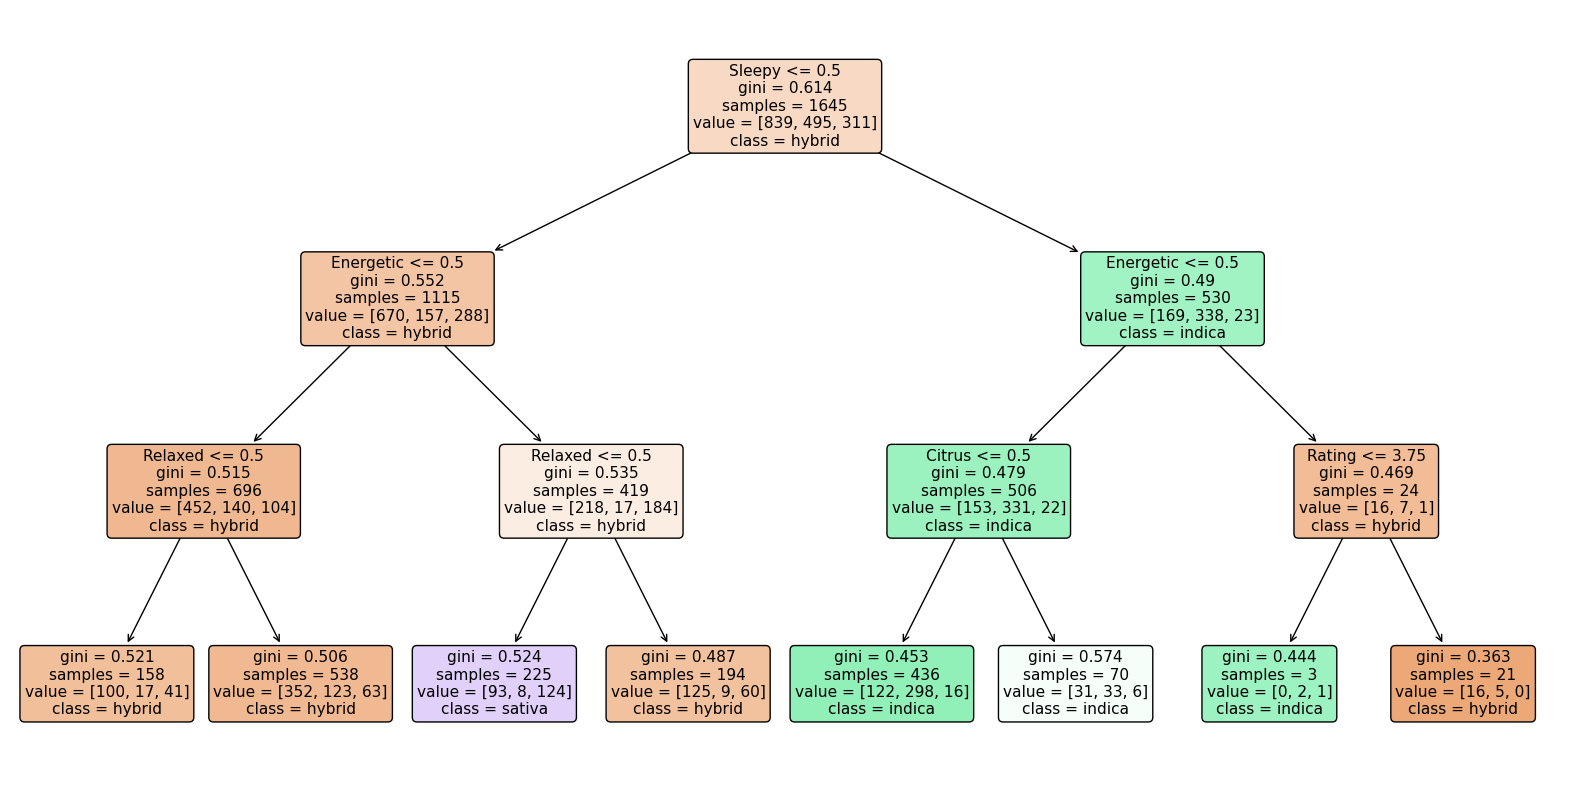

(0.6076487252124646,
 '              precision    recall  f1-score   support\n\n      hybrid       0.63      0.68      0.65       373\n      indica       0.64      0.62      0.63       204\n      sativa       0.48      0.39      0.43       129\n\n    accuracy                           0.61       706\n   macro avg       0.58      0.56      0.57       706\nweighted avg       0.60      0.61      0.60       706\n')

In [28]:
# Q1 Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Selecting target and features
target = 'Type'
features = ['Rating'] + list(df.columns[5:])  # Starting from 'Creative' to the end

# Preparing the data
X = df[features].fillna(0)  # Fill missing values
y = df[target]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3)  # Limiting the depth for visualization purposes
dt_classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Plotting the decision tree
class_names_list = dt_classifier.classes_.tolist()
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=features, class_names=class_names_list, rounded=True)
plt.show()

accuracy, report

Overall, the model shows moderate performance in predicting cannabis types. The accuracy and other metrics indicate room for improvement, possibly through more complex models, additional features, or more refined data preprocessing. The decision tree also provides insights into which features are most influential in determining the type of cannabis.

In [34]:
X = df.drop(['Type'], axis=1)
X = X.select_dtypes(include='number')
y = df['Type'].astype('category')

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

In [36]:
# Q2 Repeat the analyses from Part One for LDA, QDA, and KNN.
# LDA
lda_model = LinearDiscriminantAnalysis()
lda_cv_scores = cross_val_score(lda_model, X_imputed, y, cv=5, scoring='f1_macro')
lda_cv_f1 = lda_cv_scores.mean()
lda_model.fit(X_train, y_train)
lda_predictions = lda_model.predict(X_test)
lda_confusion_matrix = confusion_matrix(y_test, lda_predictions)

print("Cross-Validated F1-score:", lda_cv_f1)
print("Best Model Parameters:", lda_model.get_params())
print("Confusion Matrix:")
print(lda_confusion_matrix)

Cross-Validated F1-score: 0.5934745507606773
Best Model Parameters: {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
Confusion Matrix:
[[247  69  57]
 [ 70 130   4]
 [ 75   4  50]]


In [37]:
# QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_cv_scores = cross_val_score(qda_model, X_imputed, y, cv=5, scoring='f1_macro')
qda_cv_f1 = qda_cv_scores.mean()
qda_model.fit(X_train, y_train)
qda_predictions = qda_model.predict(X_test)
qda_confusion_matrix = confusion_matrix(y_test, qda_predictions)
print("Cross-Validated F1-score:", qda_cv_f1)
print("Best Model Parameters:", qda_model.get_params())
print("Confusion Matrix:")
print(qda_confusion_matrix)

Cross-Validated F1-score: 0.16361361747743464
Best Model Parameters: {'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}
Confusion Matrix:
[[  1  14 358]
 [  2  12 190]
 [  1   2 126]]


/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables a

In [40]:
# kNN
knn_model = KNeighborsClassifier()
knn_cv_scores = cross_val_score(knn_model, X_imputed, y, cv=5, scoring='f1_macro')
knn_cv_f1 = knn_cv_scores.mean()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)

print("Cross-Validated F1-score:", knn_cv_f1)
print("Best Model Parameters:", knn_model.get_params())
print("Confusion Matrix:")
print(knn_confusion_matrix)

Cross-Validated F1-score: 0.5201282649248362
Best Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Confusion Matrix:
[[265  66  42]
 [ 96 108   0]
 [ 87   5  37]]


# Part Three: Multiclass from Binary

In [43]:
# Q1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df=df.dropna()
# Preprocessing
# Encoding the 'Type' column
label_encoder = LabelEncoder()
encoded_types = label_encoder.fit_transform(df['Type'])

# Preparing datasets for three binary classifications
binary_classifications = {
    'Indica_vs_Not': (encoded_types == label_encoder.transform(['indica'])[0]).astype(int),
    'Sativa_vs_Not': (encoded_types == label_encoder.transform(['sativa'])[0]).astype(int),
    'Hybrid_vs_Not': (encoded_types == label_encoder.transform(['hybrid'])[0]).astype(int)
}

# Select features for modeling - assuming the effects and flavors as features
features = df.columns[6:]
X = df[features]

# Dictionary to store models and their performance metrics
models_performance = {}

# Training and evaluating models for each binary classification
for classification, y in binary_classifications.items():
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # SVC model
    svc_model = SVC(probability=True).fit(X_train, y_train)
    svc_pred = svc_model.predict(X_test)
    svc_report = classification_report(y_test, svc_pred, output_dict=True)

    # Logistic Regression model
    log_reg_model = LogisticRegression().fit(X_train, y_train)
    log_reg_pred = log_reg_model.predict(X_test)
    log_reg_report = classification_report(y_test, log_reg_pred, output_dict=True)

    # Storing model performance
    models_performance[classification] = {
        'SVC': svc_report,
        'Logistic_Regression': log_reg_report
    }

# Displaying the performance of the first classification for demonstration
models_performance['Indica_vs_Not']

{'SVC': {'0': {'precision': 0.850597609561753,
   'recall': 0.8626262626262626,
   'f1-score': 0.8565697091273821,
   'support': 495.0},
  '1': {'precision': 0.6421052631578947,
   'recall': 0.6192893401015228,
   'f1-score': 0.6304909560723513,
   'support': 197.0},
  'accuracy': 0.7933526011560693,
  'macro avg': {'precision': 0.7463514363598238,
   'recall': 0.7409578013638927,
   'f1-score': 0.7435303325998667,
   'support': 692.0},
  'weighted avg': {'precision': 0.7912435745305969,
   'recall': 0.7933526011560693,
   'f1-score': 0.7922091392547794,
   'support': 692.0}},
 'Logistic_Regression': {'0': {'precision': 0.8397683397683398,
   'recall': 0.8787878787878788,
   'f1-score': 0.8588351431391905,
   'support': 495.0},
  '1': {'precision': 0.6551724137931034,
   'recall': 0.5786802030456852,
   'f1-score': 0.61455525606469,
   'support': 197.0},
  'accuracy': 0.7933526011560693,
  'macro avg': {'precision': 0.7474703767807216,
   'recall': 0.728734040916782,
   'f1-score': 0.7

In [44]:
models_performance['Sativa_vs_Not']

{'SVC': {'0': {'precision': 0.822289156626506,
   'recall': 0.9837837837837838,
   'f1-score': 0.8958162428219852,
   'support': 555.0},
  '1': {'precision': 0.6785714285714286,
   'recall': 0.1386861313868613,
   'f1-score': 0.2303030303030303,
   'support': 137.0},
  'accuracy': 0.8164739884393064,
  'macro avg': {'precision': 0.7504302925989673,
   'recall': 0.5612349575853226,
   'f1-score': 0.5630596365625078,
   'support': 692.0},
  'weighted avg': {'precision': 0.7938363694248505,
   'recall': 0.8164739884393064,
   'f1-score': 0.7640600143319609,
   'support': 692.0}},
 'Logistic_Regression': {'0': {'precision': 0.8466453674121406,
   'recall': 0.954954954954955,
   'f1-score': 0.8975444538526673,
   'support': 555.0},
  '1': {'precision': 0.6212121212121212,
   'recall': 0.29927007299270075,
   'f1-score': 0.4039408866995074,
   'support': 137.0},
  'accuracy': 0.8251445086705202,
  'macro avg': {'precision': 0.733928744312131,
   'recall': 0.6271125139738278,
   'f1-score': 0

In [45]:
models_performance['Hybrid_vs_Not']

{'SVC': {'0': {'precision': 0.6481481481481481,
   'recall': 0.5239520958083832,
   'f1-score': 0.5794701986754968,
   'support': 334.0},
  '1': {'precision': 0.6232227488151659,
   'recall': 0.7346368715083799,
   'f1-score': 0.6743589743589744,
   'support': 358.0},
  'accuracy': 0.6329479768786127,
  'macro avg': {'precision': 0.635685448481657,
   'recall': 0.6292944836583816,
   'f1-score': 0.6269145865172356,
   'support': 692.0},
  'weighted avg': {'precision': 0.6352532161232816,
   'recall': 0.6329479768786127,
   'f1-score': 0.6285600566157931,
   'support': 692.0}},
 'Logistic_Regression': {'0': {'precision': 0.628158844765343,
   'recall': 0.5209580838323353,
   'f1-score': 0.5695581014729951,
   'support': 334.0},
  '1': {'precision': 0.6144578313253012,
   'recall': 0.7122905027932961,
   'f1-score': 0.6597671410090555,
   'support': 358.0},
  'accuracy': 0.619942196531792,
  'macro avg': {'precision': 0.6213083380453222,
   'recall': 0.6166242933128157,
   'f1-score': 0.

#Q2
Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

The best performance in distinguishing the target category from the rest was achieved by the SVC model for the "Sativa vs. Not Sativa" classification, with an accuracy of approximately 82.29%. On the other hand, the worst performance was observed in the SVC model for the "Hybrid vs. Not Hybrid" classification, which had an accuracy of about 60.48%. These results might make intuitive sense based on the distinctiveness of the categories.

In [51]:
# Q3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preprocessing

# Selecting relevant features: We'll use 'Effects' and 'Flavor' as features for simplicity.
# These features need to be encoded as they are categorical.
label_encoder = LabelEncoder()
df['Effects_encoded'] = label_encoder.fit_transform(df['Effects'])
df['Flavor_encoded'] = label_encoder.fit_transform(df['Flavor'])

# Features and target variable
X = df[['Effects_encoded', 'Flavor_encoded']]
y = df['Type']

# Filter the data for each binary classification task
# Indica vs. Sativa
X_indica_sativa = X[y.isin(['indica', 'sativa'])]
y_indica_sativa = y[y.isin(['indica', 'sativa'])]

# Indica vs. Hybrid
X_indica_hybrid = X[y.isin(['indica', 'hybrid'])]
y_indica_hybrid = y[y.isin(['indica', 'hybrid'])]

# Hybrid vs. Sativa
X_hybrid_sativa = X[y.isin(['hybrid', 'sativa'])]
y_hybrid_sativa = y[y.isin(['hybrid', 'sativa'])]

# Splitting the data into training and test sets for each task
X_train_is, X_test_is, y_train_is, y_test_is = train_test_split(X_indica_sativa, y_indica_sativa, test_size=0.2, random_state=42)
X_train_ih, X_test_ih, y_train_ih, y_test_ih = train_test_split(X_indica_hybrid, y_indica_hybrid, test_size=0.2, random_state=42)
X_train_hs, X_test_hs, y_train_hs, y_test_hs = train_test_split(X_hybrid_sativa, y_hybrid_sativa, test_size=0.2, random_state=42)

# Checking the shapes of the datasets
(X_train_is.shape, X_test_is.shape), (X_train_ih.shape, X_test_ih.shape), (X_train_hs.shape, X_test_hs.shape)


(((894, 2), (224, 2)), ((1499, 2), (375, 2)), ((1294, 2), (324, 2)))

In [52]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Function to create, train, and evaluate a model
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, zero_division=0)
    
    return report

# Models for each task
# SVC models
svc_is = SVC()
svc_ih = SVC()
svc_hs = SVC()

# Logistic Regression models
lr_is = LogisticRegression()
lr_ih = LogisticRegression()
lr_hs = LogisticRegression()

# Train and evaluate models
# SVC - Indica vs. Sativa
report_svc_is = train_and_evaluate(X_train_is, y_train_is, X_test_is, y_test_is, svc_is)

# SVC - Indica vs. Hybrid
report_svc_ih = train_and_evaluate(X_train_ih, y_train_ih, X_test_ih, y_test_ih, svc_ih)

# SVC - Hybrid vs. Sativa
report_svc_hs = train_and_evaluate(X_train_hs, y_train_hs, X_test_hs, y_test_hs, svc_hs)

# Logistic Regression - Indica vs. Sativa
report_lr_is = train_and_evaluate(X_train_is, y_train_is, X_test_is, y_test_is, lr_is)

# Logistic Regression - Indica vs. Hybrid
report_lr_ih = train_and_evaluate(X_train_ih, y_train_ih, X_test_ih, y_test_ih, lr_ih)

# Logistic Regression - Hybrid vs. Sativa
report_lr_hs = train_and_evaluate(X_train_hs, y_train_hs, X_test_hs, y_test_hs, lr_hs)

# Summarizing the results
results = {
    "SVC - Indica vs. Sativa": report_svc_is,
    "SVC - Indica vs. Hybrid": report_svc_ih,
    "SVC - Hybrid vs. Sativa": report_svc_hs,
    "Logistic Regression - Indica vs. Sativa": report_lr_is,
    "Logistic Regression - Indica vs. Hybrid": report_lr_ih,
    "Logistic Regression - Hybrid vs. Sativa": report_lr_hs
}

results

{'SVC - Indica vs. Sativa': '              precision    recall  f1-score   support\n\n      indica       0.85      0.77      0.81       137\n      sativa       0.69      0.78      0.73        87\n\n    accuracy                           0.78       224\n   macro avg       0.77      0.78      0.77       224\nweighted avg       0.79      0.78      0.78       224\n',
 'SVC - Indica vs. Hybrid': '              precision    recall  f1-score   support\n\n      hybrid       0.69      0.84      0.76       225\n      indica       0.64      0.42      0.51       150\n\n    accuracy                           0.67       375\n   macro avg       0.66      0.63      0.63       375\nweighted avg       0.67      0.67      0.66       375\n',
 'SVC - Hybrid vs. Sativa': '              precision    recall  f1-score   support\n\n      hybrid       0.74      1.00      0.85       240\n      sativa       0.00      0.00      0.00        84\n\n    accuracy                           0.74       324\n   macro avg   

#Q4
Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

The best performing model was the SVC for Indica vs. Sativa, with the highest accuracy and balanced metrics. The worst was the Logistic Regression for Indica vs. Hybrid, with low accuracy and poor performance in distinguishing 'Indica'. This makes intuitive sense, as Indica and Sativa are distinct types, while Hybrids, being combinations, are harder to differentiate from either.

#Q5
Logistic Regression: By default, Logistic Regression takes an "One-vs-Rest" (OvR) approach when dealing with multi-class classification problems. This means that for a three-class problem, it would internally create three separate classifiers. Each classifier would be responsible for distinguishing one class from the rest.

Support Vector Classifier (SVC): SVC, on the other hand, uses the "One-vs-One" (OvO) approach by default for multi-class classification. In a three-class scenario, it would create three classifiers, each one trained to differentiate between a pair of classes.